# Maps

Drawing maps can be achieved by using the [cartopy](https://scitools.org.uk/cartopy/docs/latest/#) library, which can be used with matplotlib.


<div class='alert alert-danger'>
    <strong>Cartopy vs. Basemap</strong> The Cartopy library is planned to take over the <a href="https://matplotlib.org/basemap/index.html" target="_blank">basemap</a> one. Therefore, the latter should not be used anymore, except if the desired Basemap functionality is not yet integrated to cartopy.
</div>

## Install

Since it is not a standard library, it needs to be installed. It is best to do it using `conda`, since it needs external C libraries. To install it, type in a terminal:

`conda install cartopy`

## Map initialisation

Maps are initialized by using the `pyplot.axes` with a `projection` argument that defines the Coordinate Reference System, i.e. a projection system. The list of available projections can be found [here](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html).

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = False

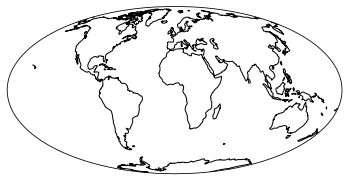

In [2]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.Mollweide())
l = ax.coastlines()  # add coastlines

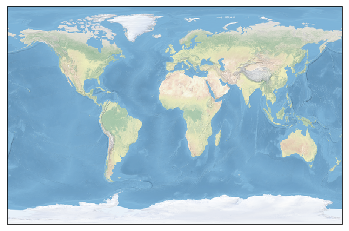

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
l = ax.stock_img()

## Specifying map limits

Map limits can be specified using the `set_extent` method. It takes as argument the limits of the maps and eventually a `crs` object, specifying the coordinate system used to specify the limits. 

**In most cases, limits are defined in geographical coordinates. Thus the `crs` argument must be equal to `ccrs.PlateCarree()`**

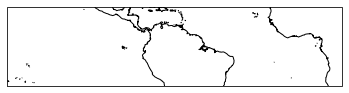

In [4]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-150, 20, -20, 20], crs=ccrs.PlateCarree())
l = ax.coastlines()

## Adding map features

In order to add features to the map (land color, ocean colors, etc.), use the [cartopy.feature](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html) interface.

Features should be added to the current axes by using the `add_feature` method.

### Using predefined features

Some features, such as lands ans oceans, coastlines, country borders and lakes are avaiblable. For instance, land mask is accessed as `cfeature.LAND`.

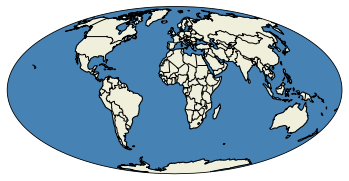

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection=ccrs.Mollweide())
ax.add_feature(cfeature.LAND, facecolor=cfeature.COLORS['land'])
ax.add_feature(cfeature.COASTLINE, edgecolor='k')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN, color='SteelBlue')
plt.show()

There is the possibility to control the resolution of the default features you by using the `with_scale` argument.

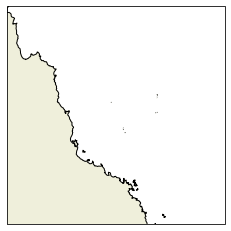

In [6]:
latc = -18 + 56/60.+ 15/(60 * 60)
lonc = 148 + 5/60 + 45/(60*60)

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lonc - 5, lonc + 5, latc - 5, latc + 5], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor=cfeature.COLORS['land'])
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='k')
plt.show()

### Using Natural Earth Data data

It is also possible to use include other features from [naturalearthdata](https://www.naturalearthdata.com/) by using the 
`cartopy.feature.NaturalEarthFeature` interface. For instance, one can add coral reefs as follows:

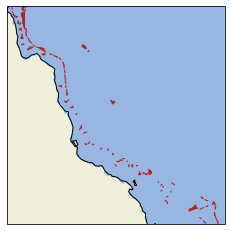

In [7]:
# Create a feature for reefs image
reefs = cfeature.NaturalEarthFeature(
    category='physical',
    name='reefs',
    scale='10m',
    edgecolor='face',
    facecolor='FireBrick'
)

latc = -18 + 56/60.+ 15/(60 * 60)
lonc = 148 + 5/60 + 45/(60*60)

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lonc - 5, lonc + 5, latc - 5, latc + 5], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(reefs)
ax.coastlines(resolution='50m')
plt.show()

### Using GSHSS features

There is also the possibility to use [GSHSS](https://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html) features:

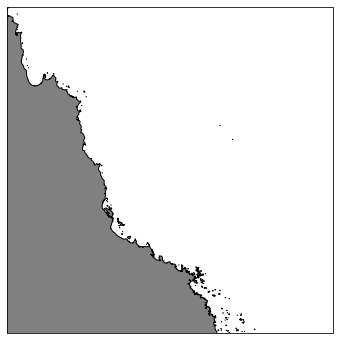

In [8]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_xlim(lonc - 5, lonc + 5)
ax.set_ylim(latc - 5, latc + 5)
ax.add_feature(cfeature.GSHHSFeature(scale='intermediate', levels=[1], facecolor='gray', edgecolor='k'))
plt.show()

## Labeling

Informations about how to add grid labels are provided here: https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html

Here is a small example on how to do it.

First, you need to import some modules and to define a dictionary containing the map parameters:

In [9]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

# definition of grid params
gridparams = {'crs': ccrs.PlateCarree(central_longitude=0), 
              'draw_labels':True, 'linewidth':0.5, 
              'color':'k', 'alpha':1, 'linestyle':'--'}

Then you can use the `ax.gridlines` method with the `**gridparams` method to add the grid lines.

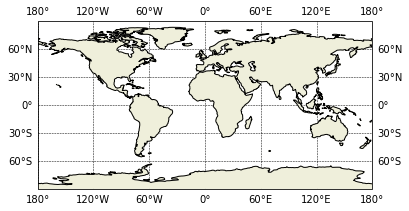

In [10]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=1)
ax.add_feature(cfeature.COASTLINE, zorder=2)
gl = ax.gridlines(**gridparams, zorder=0) 

If you want to control which labels are drawn, and where, you can modify the values of the `gl` object as follows:

/home/barrier/Softwares/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/barrier/Softwares/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


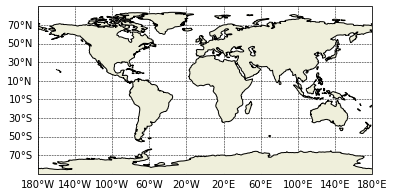

In [11]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=1)
ax.add_feature(cfeature.COASTLINE, zorder=2)
gl = ax.gridlines(**gridparams, zorder=0) 
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180 + 40, 40))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90 + 20, 20))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

## Plotting data

Examples on how to plot data using Cartopy are provided [here](https://scitools.org.uk/cartopy/docs/latest/matplotlib/advanced_plotting.html).

Basically, the same methods as in Matplotlib are used, except that a `transform` argument must be set equal to the projection used in the input data.

**In most cases, the data are provided in geographical coordinates. Therefore, the `transform` argument must be set to `ccrs.PlateCarree()`.**

First, let's load a dataset:

In [12]:
import xarray as xr
import numpy as np

data = xr.open_dataset('../io/data/UV500storm.nc')
lon = data['lon'].values
lat = data['lat'].values
u = data['u'].values[0]
v = data['v'].values[0]
u = np.ma.masked_where(np.abs(u) > 999, u)
v = np.ma.masked_where(np.abs(v) > 999, v)
vel = np.sqrt(u*u + v*v, where=(np.ma.getmaskarray(u) == False))

### Lines

In order to draw lines that follow geodetic distance, set the `transform` argument as equal to `ccrs.Geodetic()`.

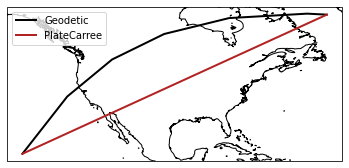

In [13]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
x = [lon.min(), lon.max()]
y = [lat.min(), lat.max()]
ax.plot(x, y, transform=ccrs.Geodetic(), label='Geodetic')
ax.plot(x, y, transform=ccrs.PlateCarree(), label='PlateCarree')
plt.legend()
ax.coastlines()

### Contours

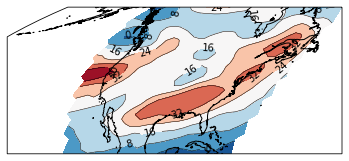

In [14]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.Mollweide())
cs = plt.contourf(lon, lat, u, transform=ccrs.PlateCarree())
cl = plt.contour(lon, lat, u, transform=ccrs.PlateCarree(), colors='k', linewidths=0.5)
plt.clabel(cl)
ax.coastlines()  # add coastlines
plt.show()

## Quivers

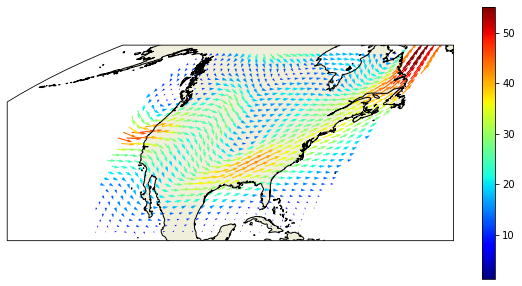

In [15]:
import matplotlib

fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.Mollweide())
cs = plt.quiver(lon, lat, u, v, vel, cmap=plt.cm.jet, transform=ccrs.PlateCarree())
cb = plt.colorbar(cs, shrink=0.5)

ax.coastlines()  # add coastlines
ax.add_feature(cfeature.LAND)

## Paneling

Proper paneling can be obtained by using the `ImageGrid` Matplotlib function in combination with the `GeoAxes` method (cf. https://scitools.org.uk/cartopy/docs/v0.16/gallery/axes_grid_basic.html)

/home/barrier/Softwares/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/barrier/Softwares/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


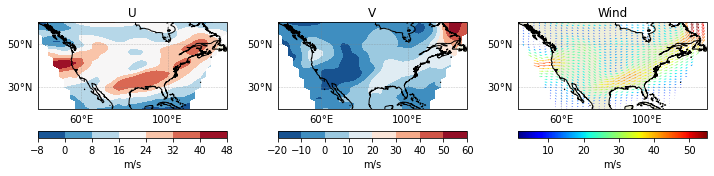

In [16]:
from mpl_toolkits.axes_grid1 import ImageGrid
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.feature as cfeature

def add_labels(ax, projout):
    gridparams = {'crs': projout, 
              'draw_labels':True, 'linewidth':0.5, 
              'color':'gray', 'alpha':0.5, 'linestyle':'--'}
    gl = ax.gridlines(**gridparams)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlocator = mticker.FixedLocator(np.arange(-180, 180 + 40, 40))
    gl.ylocator = mticker.FixedLocator(np.arange(-90, 90 + 20, 20))

projout = ccrs.PlateCarree(central_longitude=180)
projin = ccrs.PlateCarree()

fig = plt.figure(figsize=(12, 8))
axes_class = (GeoAxes, dict(map_projection=projout))

axgr = ImageGrid(fig, 111,  axes_class=axes_class, nrows_ncols=(1, 3), axes_pad=(0.7, 0.5), label_mode='', 
                cbar_mode='each', cbar_size=0.1, cbar_pad=0.3, cbar_location="bottom", share_all=True)

axcbar = axgr.cbar_axes

for i, ax in enumerate(axgr):
    if i == 0:
        cs = ax.contourf(lon, lat, u, transform=projin)
        ax.set_title('U')
        cb = axcbar[i].colorbar(cs)
    elif i == 1:
        cs = ax.contourf(lon, lat, v, transform=projin)
        cb = axcbar[i].colorbar(cs)
        ax.set_title('V')
    else:
        cs = ax.quiver(lon, lat, u, v, vel, cmap=plt.cm.jet, transform=projin)
        cb = axcbar[i].colorbar(cs)
        ax.set_title('Wind')
    ax.add_feature(cfeature.LAND)  # add coastlines
    ax.add_feature(cfeature.COASTLINE)  # add coastlines
    cb.set_label('m/s')
    add_labels(ax, projout)

## Switching from one system to another

The `transform_points` method can be used to navigate between coordinates systems. It is called as follow:

```
destCRS.transform_points(sourceCrs, longitudes, latitudes)
```

For instance, to convert longitudes/latitudes into Mollweide map coordinates:

In [17]:
projin = ccrs.PlateCarree()
projout = ccrs.Mollweide()

N = 10
lone = np.linspace(-180, 180, N)
late = np.full((N), 0)

convert = projout.transform_points(projin, lone, late)
xe = convert[:, 0]
ye = convert[:, 1]
ze = convert[:, 2]
xe,  ye

(array([-18040095.69614736, -14031185.54144795, -10022275.38674853,
         -6013365.23204912,  -2004455.07734971,   2004455.07734971,
          6013365.23204912,  10022275.38674853,  14031185.54144795,
         18040095.69614736]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

Note that the `transform_vectors` can be used to convert vectors from one CRS to another.

## Changing map boundary

There is the possibility to change the map bounding box. This is especially usefull if you want to use the Masked Lambert Conformal projection. First, let's have a look at the `LCC` projection:

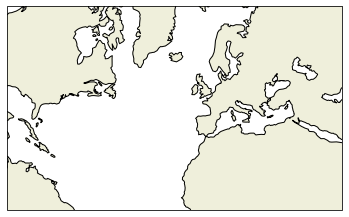

In [18]:
lonw = -80
lone = 40
lats = 10
latn = 75

lon0 = 0.5 * (lone + lonw)
lat0 = 0.5 * (lats + latn)

plt.figure()
proj = ccrs.LambertConformal(central_longitude=lon0)
ax = plt.axes(projection=proj)
ax.set_extent([lonw, lone, lats, latn], ccrs.PlateCarree())
i = ax.coastlines()
ax.add_feature(cfeature.LAND)

In order to mask it, the boundary polygon needs to be defined in geographical coordinates as a `Path` object:

In [19]:
import matplotlib.path as mpath
import numpy as np

N = 100

First, we create the array of coordinates for the southern border:

In [20]:
xsouth = np.linspace(lonw, lone, N)
ysouth = np.full((N), lats)

Then, we create the coordinates for the eastern border:

In [21]:
yeast = np.linspace(lats, latn, N)
xeast = np.full((N), lone)

Same thing is repeated for the western and eastern order. Except that the order is reversed.

In [22]:
xnorth = np.linspace(lonw, lone, N)[::-1]
ynorth = np.full((N), latn)

ywest = np.linspace(lats, latn, N)[::-1]
xwest = np.full((N), lonw)

Then, we combine all these coordinates into 1D arrays:

In [23]:
x = np.concatenate([xsouth, xeast, xnorth, xwest])
y = np.concatenate([ysouth, yeast, ynorth, ywest])

We can check that the domain is properly defined:

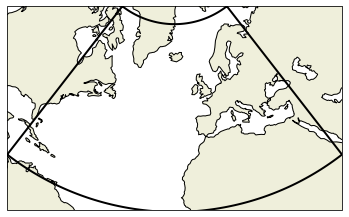

In [24]:
plt.figure()
proj = ccrs.LambertConformal(central_longitude=lon0)
ax = plt.axes(projection=proj)
ax.set_extent([x.min(), x.max(), y.min(), y.max()], ccrs.PlateCarree())
ax.plot(x, y, transform=ccrs.PlateCarree())
l = ax.coastlines()
l = ax.add_feature(cfeature.LAND)

Now, we convert the `x, y` arrays into a `matplotlib.path.Path` object:

In [25]:
path = mpath.Path(np.array([x, y]).T)

Now, the map boundary can be specified using the `set_boundary` method:

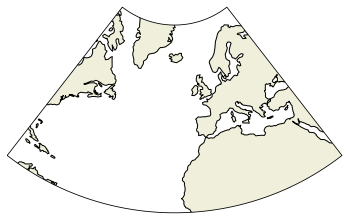

In [26]:
plt.figure()
proj = ccrs.LambertConformal(central_longitude=lon0)
ax = plt.axes(projection=proj)
ax.set_extent([x.min(), x.max(), y.min(), y.max()], ccrs.PlateCarree())
ax.set_boundary(path, transform=ccrs.PlateCarree())
l = ax.coastlines()
l = ax.add_feature(cfeature.LAND)

**The features must be added after the new boundaries have been set**

## Geodesic calculations

Geodesic calculations can be achieved using Cartopy (cf [geodesic](https://scitools.org.uk/cartopy/docs/latest/cartopy/geodesic.html)).